In [1]:
import pandas as pd
from datetime import datetime
df1= pd.read_csv('/kaggle/input/kjgjkgukyg/muvattupuzha(nasa).csv')
df1

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE
0,1984,1,1,5.22,28.58,16.66,1.21,100.58,3.84
1,1984,1,2,5.04,27.44,15.69,0.34,100.64,2.59
2,1984,1,3,5.52,28.48,15.69,0.04,100.66,2.39
3,1984,1,4,5.15,28.36,15.93,0.00,100.72,3.34
4,1984,1,5,5.03,28.59,15.62,0.00,100.65,3.05
...,...,...,...,...,...,...,...,...,...
13965,2022,3,27,5.50,30.49,18.55,7.83,100.49,3.97
13966,2022,3,28,6.67,31.12,19.41,7.37,100.44,4.34
13967,2022,3,29,6.70,30.84,19.59,3.34,100.36,3.51
13968,2022,3,30,6.16,30.92,19.23,3.05,100.33,3.68


In [2]:
df1['datetime'] = pd.to_datetime(df1[['YEAR', 'MO', 'DY']].rename(columns={'YEAR':'year', 'MO':'month', 'DY':'day'}))
df1['datetime'] = df1['datetime'].dt.strftime('%d/%m/%Y')
df1 = df1.drop(['YEAR', 'MO', 'DY'], axis=1)
df1

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,datetime
0,5.22,28.58,16.66,1.21,100.58,3.84,01/01/1984
1,5.04,27.44,15.69,0.34,100.64,2.59,02/01/1984
2,5.52,28.48,15.69,0.04,100.66,2.39,03/01/1984
3,5.15,28.36,15.93,0.00,100.72,3.34,04/01/1984
4,5.03,28.59,15.62,0.00,100.65,3.05,05/01/1984
...,...,...,...,...,...,...,...
13965,5.50,30.49,18.55,7.83,100.49,3.97,27/03/2022
13966,6.67,31.12,19.41,7.37,100.44,4.34,28/03/2022
13967,6.70,30.84,19.59,3.34,100.36,3.51,29/03/2022
13968,6.16,30.92,19.23,3.05,100.33,3.68,30/03/2022


In [3]:
df2 = pd.read_csv('/kaggle/input/kjgjkgukyg/Muvattupuzha_Gauge-Discharge_Data_Ramamangalam1978-20171.csv', header=2,na_values='null')
df2 = df2.drop(['Observed/Computed','Data Type'],axis=1)
df2

,Day,Mean Gauge (m),Discharge (cumecs)
0,24/2/1978,2.295,NaN
1,25/2/1978,2.245,NaN
2,26/2/1978,2.235,NaN
3,27/2/1978,2.110,NaN
4,28/2/1978,2.115,NaN
...,...,...,...
14337,27/5/2017,1.075,89.641
14338,28/5/2017,0.800,NaN
14339,29/5/2017,0.850,66.579
14340,30/5/2017,0.880,67.661


merging two data set based on the common dates

In [4]:
df1['datetime'] = pd.to_datetime(df1['datetime'], format='%d/%m/%Y')
df2['Day'] = pd.to_datetime(df2['Day'], format='%d/%m/%Y')

df2 = df2.rename(columns={'Day': 'datetime'})
df2 = df2.set_index('datetime')
df1=df1.set_index('datetime')
df = pd.concat([df1, df2], axis=1, join='inner')

In [5]:
# from google.colab import files
# df.to_csv('chalakudi_combined.csv', index=True)
# files.download('chalakudi_combined.csv')

In [6]:
min(df['Discharge (cumecs)'])

10.25

In [7]:
max(df['Discharge (cumecs)'])

1909.174

In [8]:
df.isnull().sum()

ALLSKY_SFC_SW_DWN       0
TS                      0
QV2M                    0
PRECTOTCORR             0
PS                      0
WS10M_RANGE             0
Mean Gauge (m)          0
Discharge (cumecs)    182
dtype: int64

In [9]:
# df['TS'] = df['TS'].interpolate(method='linear')
# df['T2M'] = df['T2M'].interpolate(method='linear')
# df['QV2M'] = df['QV2M'].interpolate(method='linear')
# df['PRECTOTCORR'] = df['PRECTOTCORR'].interpolate(method='linear')
# df['PS'] = df['PS'].interpolate(method='linear')
# df['WS50M_RANGE'] = df['WS50M_RANGE'].interpolate(method='linear')
df['Discharge (cumecs)'] = df['Discharge (cumecs)'].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

In [10]:
df.isnull().sum()

ALLSKY_SFC_SW_DWN     0
TS                    0
QV2M                  0
PRECTOTCORR           0
PS                    0
WS10M_RANGE           0
Mean Gauge (m)        0
Discharge (cumecs)    0
dtype: int64

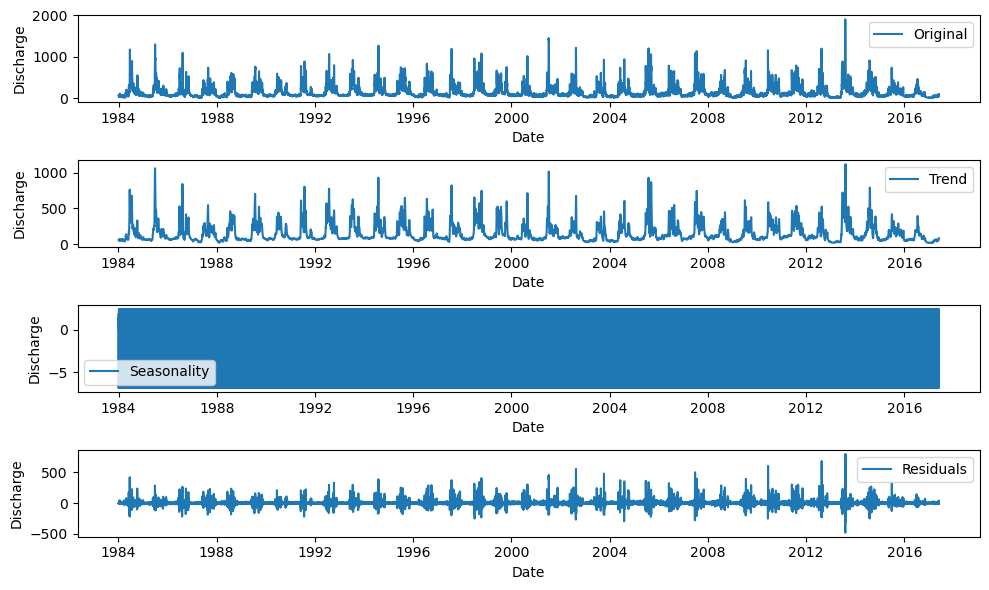

In [11]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Discharge (cumecs)'], model='additive')

trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(df['Discharge (cumecs)'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(seasonality,label='Seasonality')
plt.legend()
plt.subplot(414)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(residuals, label='Residuals')
plt.legend()
plt.tight_layout()

plt.show()

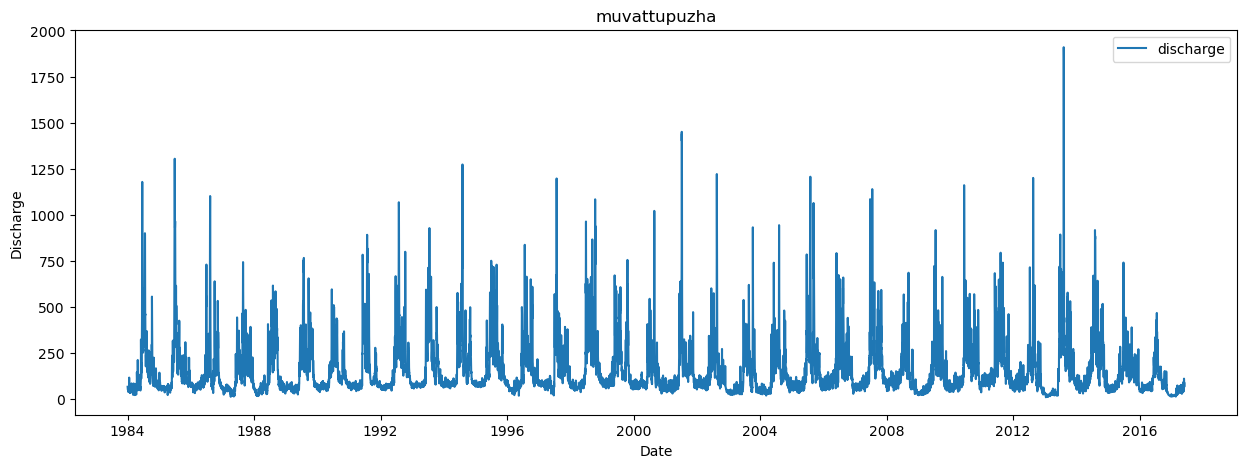

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(df['Discharge (cumecs)'],label='discharge')
plt.title("muvattupuzha")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()

In [13]:
df.corr()

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
ALLSKY_SFC_SW_DWN,1.000000,0.526633,-0.327519,-0.509122,0.278595,0.144058,-0.416108,-0.425013
TS,0.526633,1.000000,-0.202594,-0.305821,0.090020,0.411605,-0.540641,-0.519853
QV2M,-0.327519,-0.202594,1.000000,0.333580,-0.575711,-0.256906,0.297027,0.336228
PRECTOTCORR,-0.509122,-0.305821,0.333580,1.000000,-0.303609,-0.049677,0.407386,0.450941
PS,0.278595,0.090020,-0.575711,-0.303609,1.000000,0.095559,-0.226134,-0.237819
WS10M_RANGE,0.144058,0.411605,-0.256906,-0.049677,0.095559,1.000000,-0.112328,-0.109466
Mean Gauge (m),-0.416108,-0.540641,0.297027,0.407386,-0.226134,-0.112328,1.000000,0.909125
Discharge (cumecs),-0.425013,-0.519853,0.336228,0.450941,-0.237819,-0.109466,0.909125,1.000000


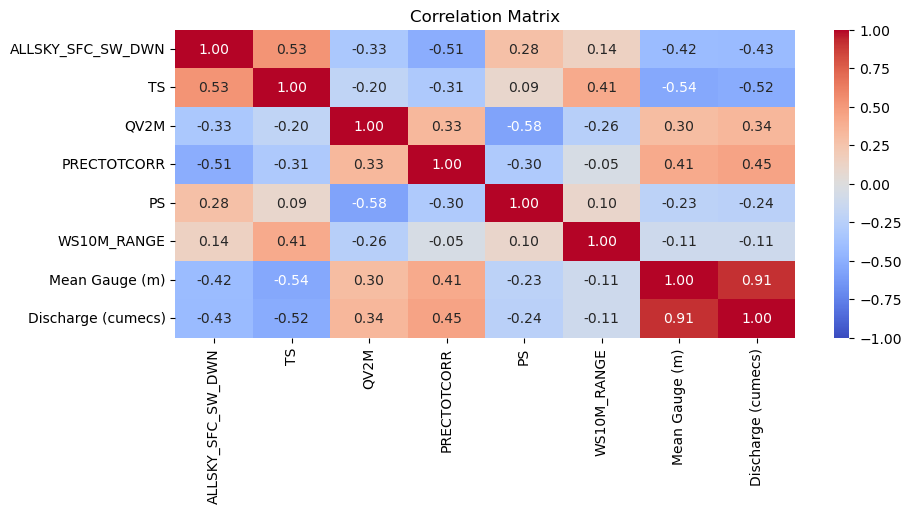

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [15]:
df

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1984-01-01,5.22,28.58,16.66,1.21,100.58,3.84,2.140,67.000
1984-01-02,5.04,27.44,15.69,0.34,100.64,2.59,2.010,55.200
1984-01-03,5.52,28.48,15.69,0.04,100.66,2.39,2.000,54.500
1984-01-04,5.15,28.36,15.93,0.00,100.72,3.34,1.980,52.600
1984-01-05,5.03,28.59,15.62,0.00,100.65,3.05,1.950,49.300
...,...,...,...,...,...,...,...,...
2017-05-27,5.57,28.20,19.96,5.81,100.17,1.33,1.075,89.641
2017-05-28,3.32,27.97,20.63,23.22,100.21,2.88,0.800,78.110
2017-05-29,1.90,28.33,20.57,19.07,100.17,3.14,0.850,66.579


splitting the data set to train and test data
train data- before 2010-01-10
test data- after 2010-01-10


In [16]:
df.index = pd.to_datetime(df.index)
cutoff_date = pd.to_datetime('2010-01-10')
train = df[df.index < cutoff_date]
test = df[df.index >= cutoff_date]
train

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1984-01-01,5.22,28.58,16.66,1.21,100.58,3.84,2.140,67.000
1984-01-02,5.04,27.44,15.69,0.34,100.64,2.59,2.010,55.200
1984-01-03,5.52,28.48,15.69,0.04,100.66,2.39,2.000,54.500
1984-01-04,5.15,28.36,15.93,0.00,100.72,3.34,1.980,52.600
1984-01-05,5.03,28.59,15.62,0.00,100.65,3.05,1.950,49.300
...,...,...,...,...,...,...,...,...
2010-01-05,5.42,27.80,15.14,0.00,100.43,2.58,1.040,69.525
2010-01-06,5.49,28.12,13.79,0.01,100.40,2.42,1.095,77.476
2010-01-07,5.58,28.05,14.95,0.00,100.49,3.22,1.030,75.394


In [17]:
test

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
2010-01-10,2.06,28.51,16.91,3.31,100.56,3.23,1.030,71.860
2010-01-11,4.74,29.13,16.17,0.55,100.67,1.53,0.860,48.202
2010-01-12,5.71,28.86,17.27,7.03,100.77,3.49,0.910,59.384
2010-01-13,5.08,27.82,18.01,3.84,100.81,2.79,0.910,60.419
2010-01-14,5.36,29.34,17.21,0.54,100.76,2.23,1.010,74.036
...,...,...,...,...,...,...,...,...
2017-05-27,5.57,28.20,19.96,5.81,100.17,1.33,1.075,89.641
2017-05-28,3.32,27.97,20.63,23.22,100.21,2.88,0.800,78.110
2017-05-29,1.90,28.33,20.57,19.07,100.17,3.14,0.850,66.579


In [18]:
x=test.index[0]
y=train.index[-1]
z=test.index
z

DatetimeIndex(['2010-01-10', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15', '2010-01-16', '2010-01-17',
               '2010-01-18', '2010-01-19',
               ...
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', name='datetime', length=2699, freq='D')

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler=scaler.fit(df)

In [20]:
train =scaler.transform(train)
train

array([[0.68053691, 0.41111111, 0.63429439, ..., 0.40987654, 0.21241203,
        0.02988535],
       [0.65637584, 0.30555556, 0.56069803, ..., 0.25555556, 0.19577735,
        0.0236713 ],
       [0.72080537, 0.40185185, 0.56069803, ..., 0.2308642 , 0.19449776,
        0.02330267],
       ...,
       [0.72885906, 0.36203704, 0.50455235, ..., 0.33333333, 0.07037748,
        0.03430574],
       [0.68187919, 0.40462963, 0.56069803, ..., 0.32962963, 0.08701216,
        0.03998686],
       [0.7114094 , 0.44907407, 0.65781487, ..., 0.22962963, 0.06269994,
        0.02664035]])

In [21]:
test=scaler.transform(test)
test

array([[0.25637584, 0.40462963, 0.65326252, ..., 0.3345679 , 0.07037748,
        0.03244469],
       [0.61610738, 0.46203704, 0.59711684, ..., 0.12469136, 0.04862444,
        0.01998606],
       [0.74630872, 0.43703704, 0.68057663, ..., 0.36666667, 0.05502239,
        0.02587465],
       ...,
       [0.23489933, 0.38796296, 0.93095599, ..., 0.32345679, 0.04734485,
        0.02966364],
       [0.51006711, 0.40185185, 0.98179059, ..., 0.24444444, 0.05118362,
        0.03023344],
       [0.71946309, 0.36944444, 0.93095599, ..., 0.20617284, 0.08317338,
        0.0398294 ]])

defining input shape to lstm
here input shape is (14,7) past 14 days values of 7 attributes
output shape is (1,3) 3 days future values 

In [22]:
import  numpy as np
trainx=[]
trainy=[]
n_future=3
n_past=14
for i in range(n_past,len(train)-n_future+1):
  # c = np.concatenate((train[i:i+1,0:3], train[i:i+1,4:8]), axis=1)
  trainx.append(train[i-n_past:i,0:8])
  trainy.append(train[i:i+n_future,7])
trainx,trainy=np.array(trainx),np.array(trainy)

In [23]:
trainx.shape

(9490, 14, 8)

In [24]:
trainy.shape

(9490, 3)

In [25]:
import tensorflow as tf
# import tf.keras as keras
from keras.models import Sequential
from keras.layers import LSTM,GRU,Bidirectional
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns


In [26]:
model1 = Sequential()
model1.add(GRU(units=256,activation='relu',return_sequences=True,input_shape=(n_past,8)))
model1.add(GRU(units=256,activation='relu',return_sequences=False))
# model1.add(Bidirectional(LSTM(units=256,activation='relu',return_sequences=True)))
# model1.add(Bidirectional(LSTM(units=128,activation='relu',return_sequences=True)))
# model1.add(Bidirectional(LSTM(units=128,activation='relu',return_sequences=True)))
# model1.add(Bidirectional(LSTM(units=128,activation='relu',return_sequences=True)))
# model1.add(Bidirectional(LSTM(units=64,activation='relu')))

model1.add(Dense(n_future,activation='relu'))
model1.compile(optimizer='adam',loss='mse')

In [27]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 14, 256)           204288    
                                                                 
 gru_1 (GRU)                 (None, 256)               394752    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 599,811
Trainable params: 599,811
Non-trainable params: 0
_________________________________________________________________


In [28]:
model1.fit(trainx, trainy, epochs=250, batch_size=8000, validation_split=0.2, verbose=1)


Epoch 1/250
1/1 [==============================] - 7s 7s/step - loss: 0.0097 - val_loss: 0.0070
Epoch 2/250
1/1 [==============================] - 0s 186ms/step - loss: 0.0070 - val_loss: 0.0060
Epoch 3/250
1/1 [==============================] - 0s 181ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 4/250
1/1 [==============================] - 0s 186ms/step - loss: 0.0054 - val_loss: 0.0045
Epoch 5/250
1/1 [==============================] - 0s 177ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 6/250
1/1 [==============================] - 0s 182ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 7/250
1/1 [==============================] - 0s 177ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 8/250
1/1 [==============================] - 0s 182ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 9/250
1/1 [==============================] - 0s 180ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/250
1/1 [==============================] - 0s 178ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 11/250

In [29]:
asd=model1.predict(trainx)

297/297 [==============================] - 2s 6ms/step


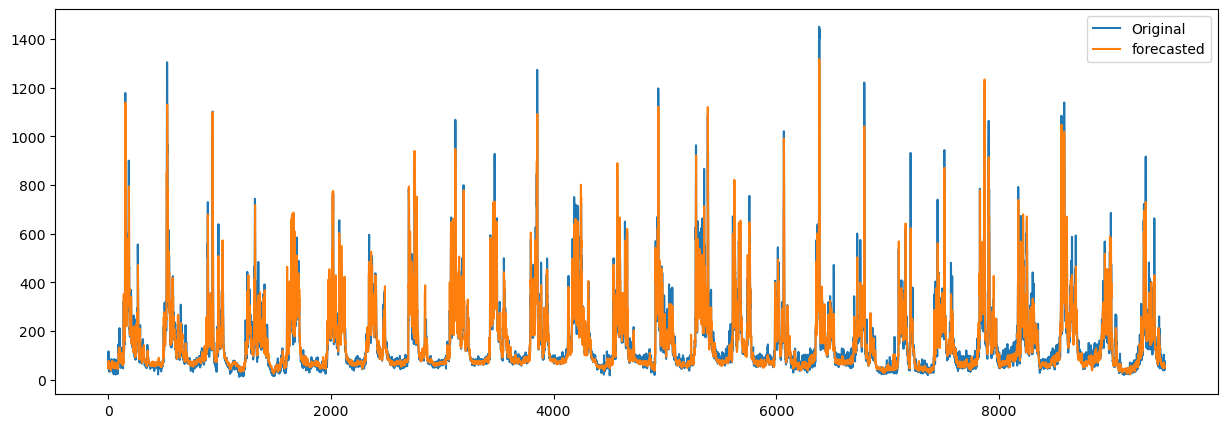

RMSE: 46.007208842313695
R-squared score: 0.90
MAD: 25.986499853509194
MAE score: 25.99


In [30]:
first_elements = [[row[0]] for row in asd]
#print(first_elements)
ppprr=np.array(first_elements)
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past:-2],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past:-2],disc))
print("RMSE:",rmse)

actual = disc_org[n_past:-2]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

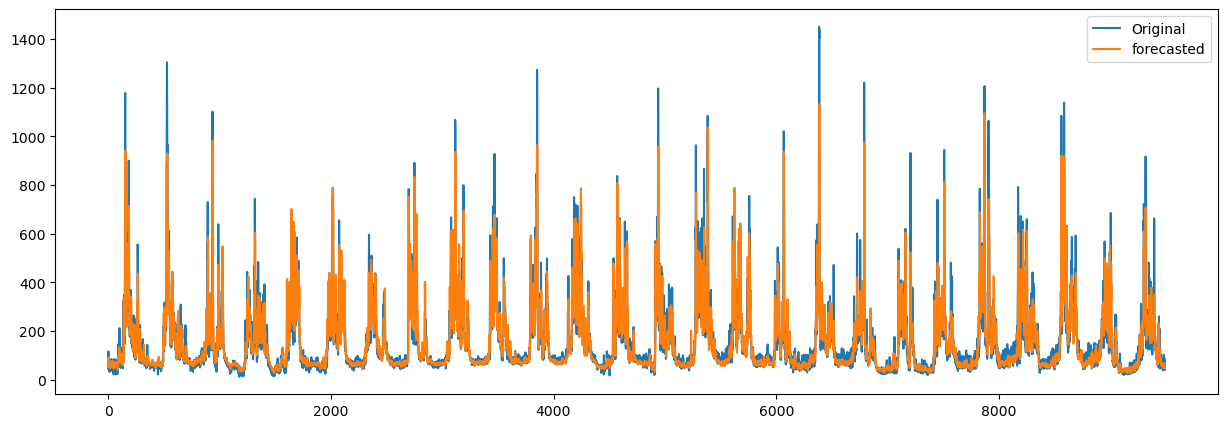

RMSE: 66.34999469326534
R-squared score: 0.79
MAD: 35.589684632051906
MAE score: 35.59


In [31]:
second_elements = [[row[1]] for row in asd]
#print(first_elements)
ppprr=np.array(second_elements )
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+1:-1],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+1:-1],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+1:-1]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

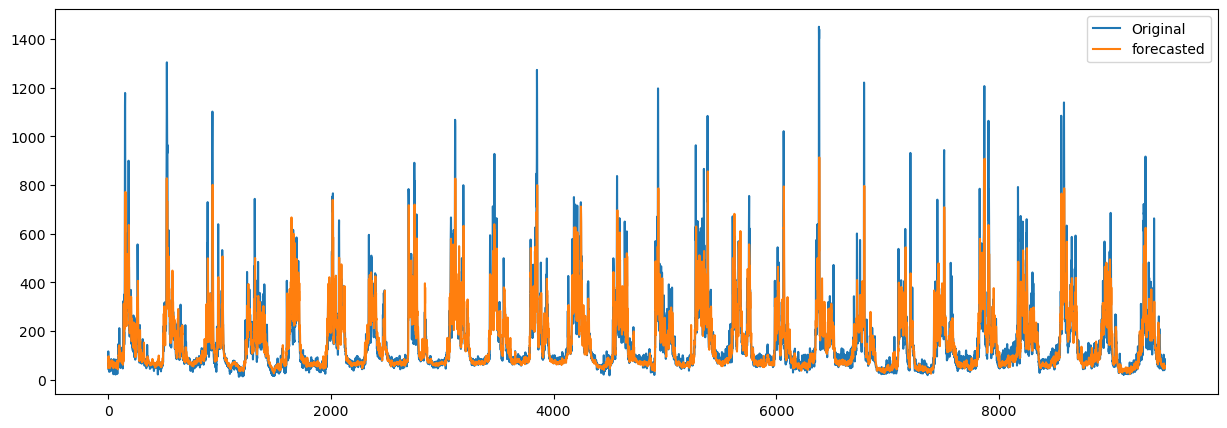

RMSE: 80.91085483039771
R-squared score: 0.69
MAD: 42.6720295153651
MAE score: 42.67


In [32]:
third_elements = [[row[2]] for row in asd]
#print(first_elements)
ppprr=np.array(third_elements )
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+2:len(disc_org)],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+2:len(disc_org)],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+2:len(disc_org)]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

for testing 
input shape is (14,7) past 14 days values of 7 attributes 
output shape is (1,3) 3 days future values

In [33]:
testx=[]
testy=[]
n_future=3
n_past=14
for i in range(n_past,len(test)-n_future+1):
  # c = np.concatenate((test[i:i+1,0:3], test[i:i+1,4:8]), axis=1)
  testx.append(test[i-n_past:i,0:8])
  testy.append(test[i:i+n_future,7])
testx,testy=np.array(testx),np.array(testy)

In [34]:
testy

array([[0.02757878, 0.02905382, 0.03688931],
       [0.02905382, 0.03688931, 0.02685731],
       [0.03688931, 0.02685731, 0.03632847],
       ...,
       [0.04180841, 0.03573603, 0.02966364],
       [0.03573603, 0.02966364, 0.03023344],
       [0.02966364, 0.03023344, 0.0398294 ]])

In [35]:
testx.shape

(2683, 14, 8)

In [36]:
testx.shape

(2683, 14, 8)

In [37]:
fore=model1.predict(testx)

84/84 [==============================] - 1s 6ms/step


In [38]:
fore

array([[0.02657702, 0.02416773, 0.0251605 ],
       [0.02671099, 0.02440041, 0.02573229],
       [0.02690399, 0.0250865 , 0.02583479],
       ...,
       [0.03701848, 0.04404964, 0.0482901 ],
       [0.037086  , 0.04186347, 0.04609709],
       [0.05100989, 0.05772086, 0.06486663]], dtype=float32)

fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take first col only (day1,day2,day3...)

In [39]:
first_elements = [[row[0]] for row in fore]
#print(first_elements)
ppprr=np.array(first_elements)
#print(pppr.shape)

In [40]:
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

(2683,)

In [41]:
first_elements = [[row[7]] for row in test]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)

In [42]:
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape

(2699,)

In [43]:
min(disc)

15.93338

In [44]:
max(disc)

1511.9884

In [45]:
min(disc_org)

10.25

In [46]:
max(disc_org)

1909.1740000000002

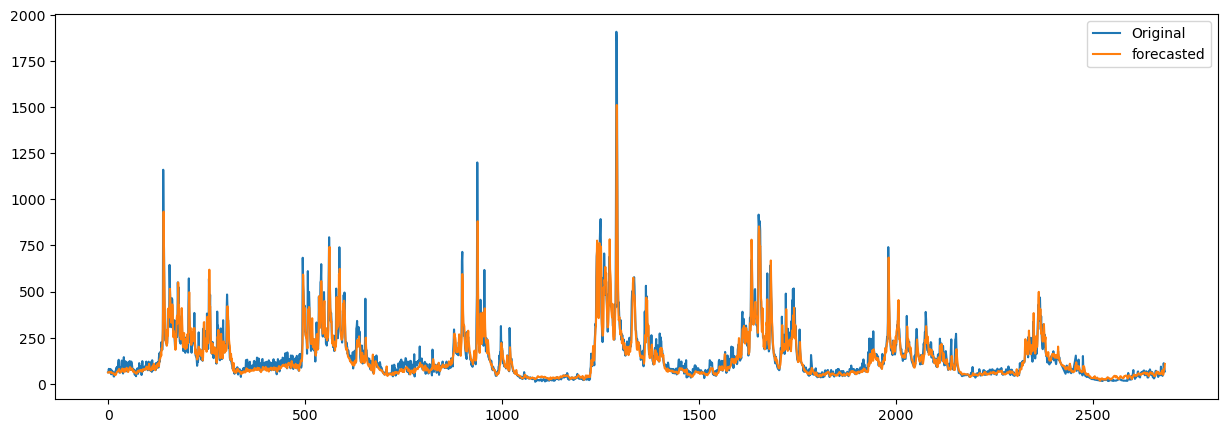

RMSE: 54.30731218409472
R-squared score: 0.86
MAD: 28.820695884631768
MAE score: 28.82


In [47]:
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past:-2],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past:-2],disc))
print("RMSE:",rmse)

actual = disc_org[n_past:-2]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

In [48]:

forcast_period_dates=pd.date_range(x,periods=len(test),freq='1d').tolist()
forcast_dates=[]
for time in forcast_period_dates:
    forcast_dates.append(time.date())
print(forcast_dates[0])
print(len(forcast_dates))
forcast_dates[-1]

2010-01-10
2699


datetime.date(2017, 5, 31)

In [49]:

dt_forcast = np.column_stack((forcast_dates[n_past:-2], disc))
dt_forcast = pd.DataFrame(dt_forcast, columns=['Date', 'discharge'])
dt_forcast['Date'] = pd.to_datetime(dt_forcast['Date'])
dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize(None) # remove any timezone information
# dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize('UTC') # set timezone to UTC

dt_forcast = dt_forcast.set_index('Date')


orginal = disc_org[n_past:-2]
dt = np.column_stack((forcast_dates[n_past:-2], orginal))
dt = pd.DataFrame(dt, columns=['Date', 'discharge'])
dt['Date'] = pd.to_datetime(dt['Date'])
dt['Date'] = dt['Date'].dt.tz_localize(None) # remove any timezone information
# dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize('UTC') # set timezone to UTC


dt = dt.set_index('Date')
dt_forcast


,discharge
Date,
2010-01-24,60.717743
2010-01-25,60.972141
2010-01-26,61.338631
2010-01-27,64.209724
2010-01-28,60.805759
...,...
2017-05-25,48.060539
2017-05-26,60.718853
2017-05-27,80.545273


In [50]:
dt

,discharge
Date,
2010-01-24,62.62
2010-01-25,65.421
2010-01-26,80.3
2010-01-27,61.25
2010-01-28,79.235
...,...
2017-05-25,60.323
2017-05-26,110.993
2017-05-27,89.641


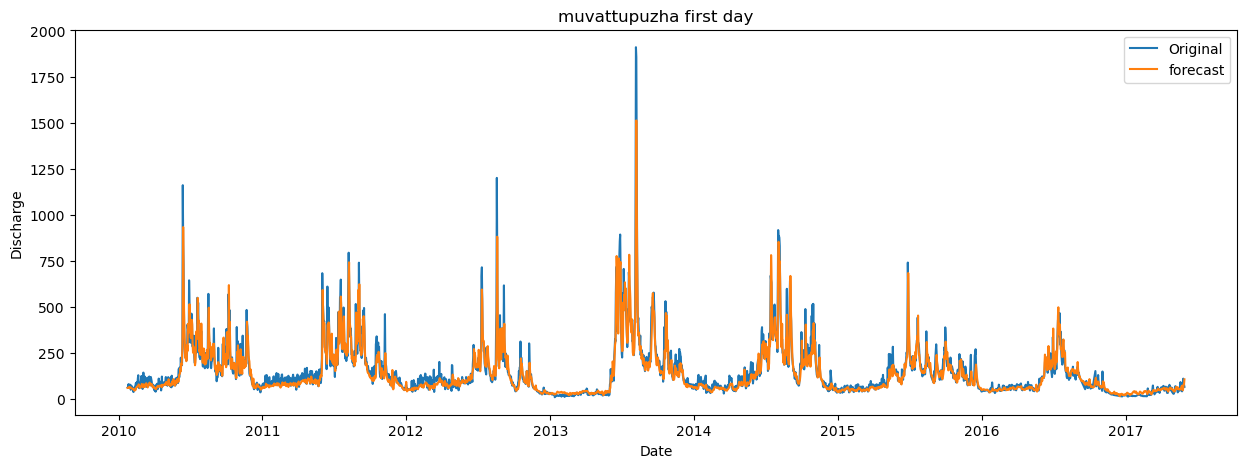

In [51]:
plt.figure(figsize=(15, 5))

plt.plot(dt.index, dt, label='Original')
plt.plot(dt_forcast.index, dt_forcast['discharge'], label='forecast')
plt.legend()
plt.title("muvattupuzha first day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.show()

In [52]:
dt['discharge'][-10:-1]

Date
2017-05-20     63.114
2017-05-21     54.467
2017-05-22      45.82
2017-05-23      42.11
2017-05-24    51.2165
2017-05-25     60.323
2017-05-26    110.993
2017-05-27     89.641
2017-05-28      78.11
Name: discharge, dtype: object

In [53]:
disc_org[-10:-1]

array([ 45.82  ,  42.11  ,  51.2165,  60.323 , 110.993 ,  89.641 ,
        78.11  ,  66.579 ,  67.661 ])

In [54]:
dt_forcast['discharge'][:10]

Date
2010-01-24    60.717743
2010-01-25    60.972141
2010-01-26    61.338631
2010-01-27    64.209724
2010-01-28    60.805759
2010-01-29    63.969505
2010-01-30    62.326962
2010-01-31    61.387402
2010-02-01    63.465714
2010-02-02    59.385101
Name: discharge, dtype: object

In [55]:
disc[:10]

array([60.717743, 60.97214 , 61.33863 , 64.209724, 60.80576 , 63.969505,
       62.32696 , 61.3874  , 63.465714, 59.3851  ], dtype=float32)

In [56]:
dt_forcast['discharge'][-10:-1]

Date
2017-05-20    59.950302
2017-05-21     64.68924
2017-05-22    69.935204
2017-05-23    72.729919
2017-05-24    48.966824
2017-05-25    48.060539
2017-05-26    60.718853
2017-05-27    80.545273
2017-05-28    80.673485
Name: discharge, dtype: object

In [57]:
disc[-10:-1]

array([59.950302, 64.68924 , 69.9352  , 72.72992 , 48.966824, 48.06054 ,
       60.718853, 80.54527 , 80.673485], dtype=float32)

In [58]:
rmse = sqrt(mean_squared_error(dt_forcast['discharge'],dt['discharge']))
print("RMSE:",rmse)
from sklearn.metrics import mean_squared_error, r2_score
import math
actual = disc_org[n_past:-2]
forecast = disc
r2 = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2))


RMSE: 54.30731218409472
R-squared score: 0.86


fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take second col only (day2,day3,day4...)

In [59]:
second_elements = [[row[1]] for row in fore]
# print(second_elements)
pppr=np.array(second_elements)
# print(pppr.shape)


In [60]:
import numpy as np
forcast_copies = np.repeat(pppr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

(2683,)

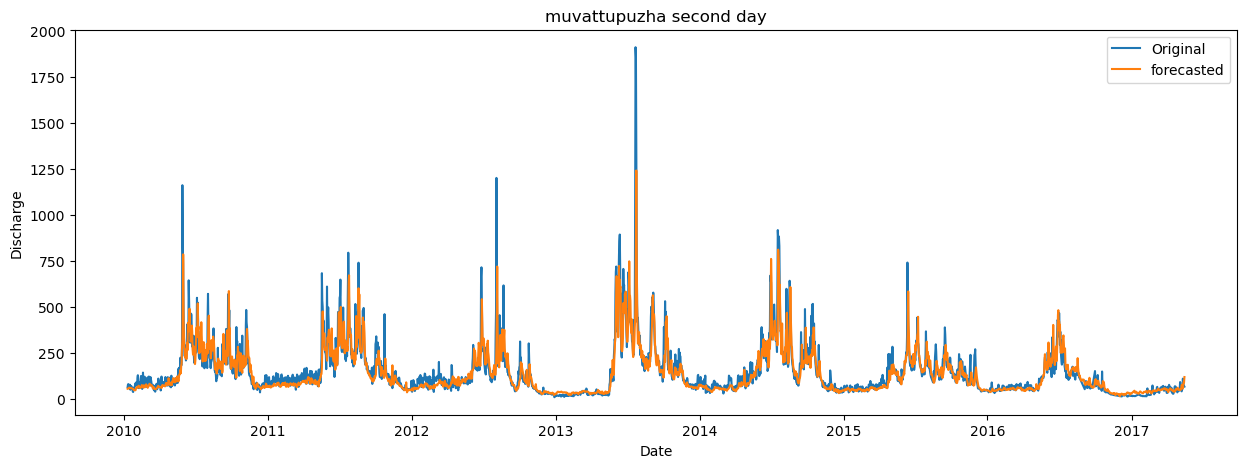

RMSE: 74.55522809946625
R-squared score: 0.73
MAD: 37.6154249140483
MAE score: 37.62


In [61]:
import datetime
dates = [datetime.datetime(2010, 1, 10) + datetime.timedelta(days=i) for i in range(len(disc_org[n_past+1:-1]))]

plt.figure(figsize=(15, 5))
plt.plot(dates,disc_org[n_past+1:-1],label='Original')
plt.plot(dates,disc,label='forecasted')
plt.title("muvattupuzha second day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+1:-1],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+1:-1]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take first col only (day3,day4,day5...)

In [62]:
third_elements = [[row[2]] for row in fore]
#print(third_elements)
pppr=np.array(third_elements)
# print(pppr.shape)


In [63]:
import numpy as np
forcast_copies = np.repeat(pppr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape


(2683,)

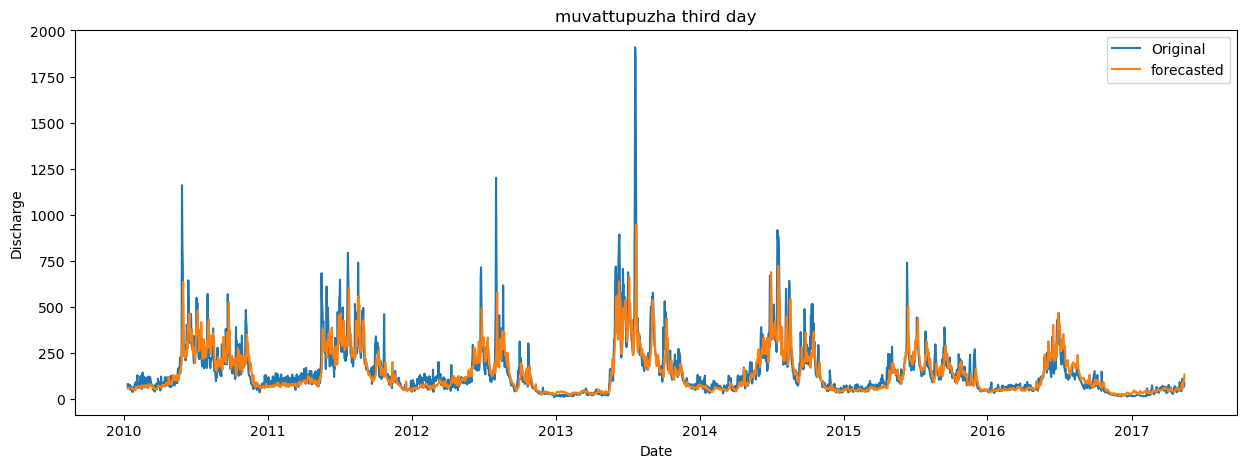

RMSE: 88.02221968946505
R-squared score: 0.62
MAD: 44.40816941998804
MAE score: 44.41


In [64]:
import datetime
dates = [datetime.datetime(2010, 1, 10) + datetime.timedelta(days=i) for i in range(len(disc_org[n_past+2:len(disc_org)]))]

plt.figure(figsize=(15, 5))
plt.plot(dates,disc_org[n_past+2:len(disc_org)],label='Original')
plt.plot(dates,disc,label='forecasted')
plt.title("muvattupuzha third day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+2:len(disc_org)],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+2:len(disc_org)]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

In [65]:
# model1.save('final_muvattupuzha_gruu.h5')

In [66]:
#!pip install kaggle
